In [25]:
import pandas as pd

# Load the dataset
df = pd.read_csv('C:\\Users\\jessi\\OneDrive\\Documents\\Dorset\\Data Analysis\\Diamonds\\diamonds.csv',sep=';')
df.head()


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# EDA
Data Overview and Descriptive Statistics

In [26]:
# Get basic information about the dataset
df.info()

# Summary statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Visualizing the Data

C:\Users\jessi\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jessi\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jessi\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jessi\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

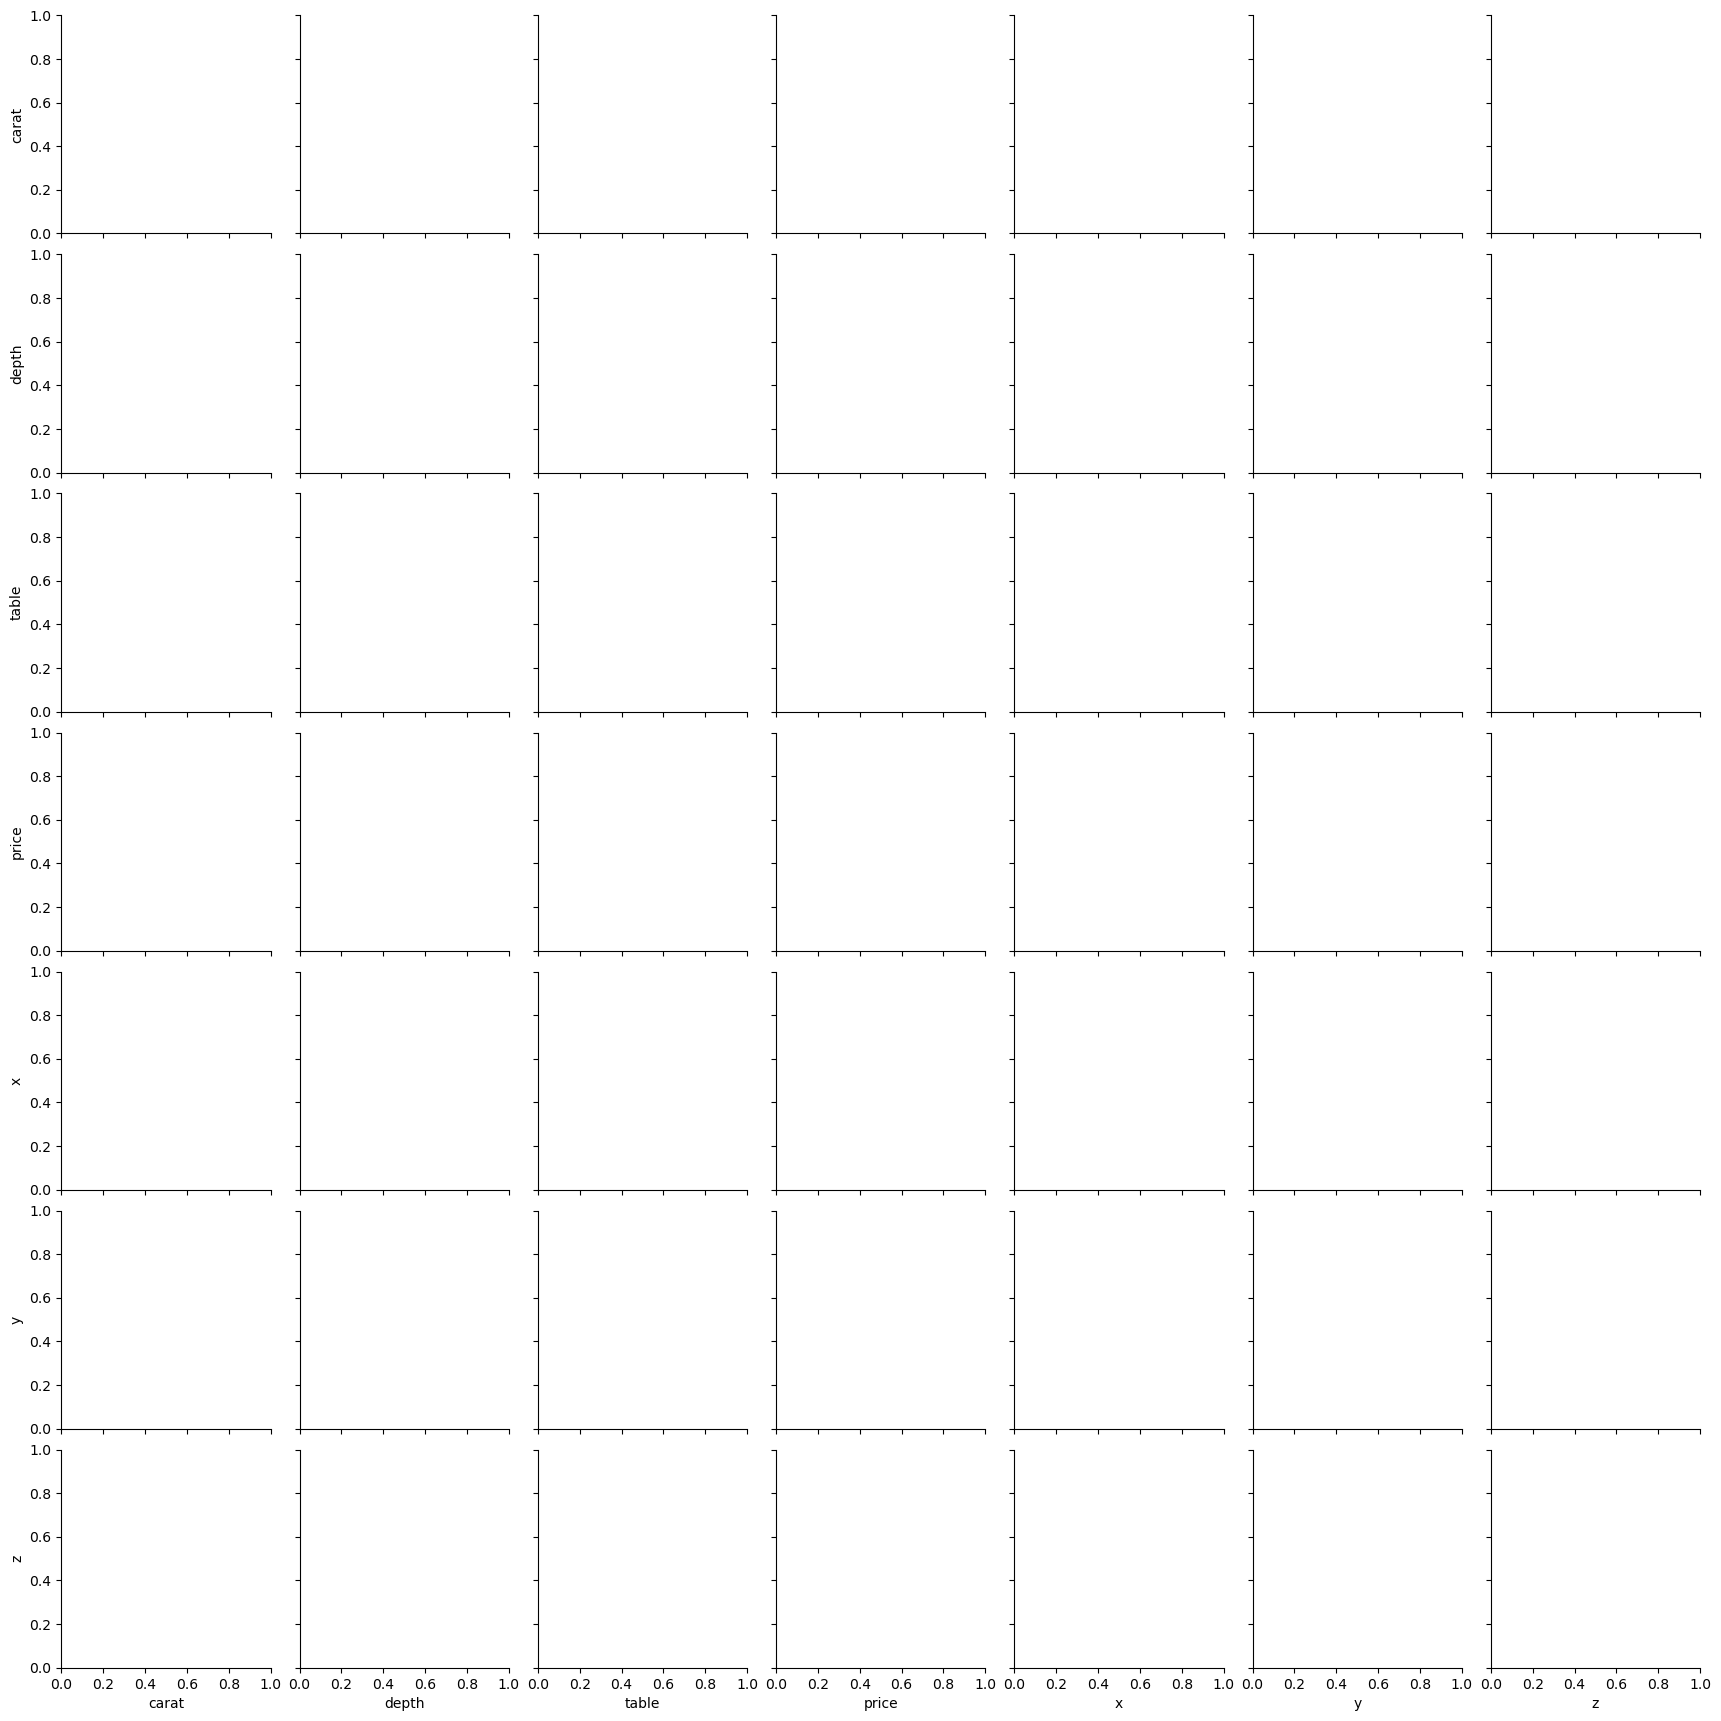

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot to visualize relationships between features
sns.pairplot(df, vars=['carat', 'depth', 'table', 'price', 'x', 'y', 'z'])
plt.show()

# Count plots for categorical features
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.countplot(ax=axes[0], x='cut', data=df)
sns.countplot(ax=axes[1], x='color', data=df)
sns.countplot(ax=axes[2], x='clarity', data=df)
plt.show()


# Cleaning

The index column 'Unnamed: 0' only provides unique id of each observation.It will have no utility in clustering. Let's drop it:

In [28]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [29]:
# Check for missing values
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

There are no missing values in this dataset.

However, diamonds should have x y and z different from 0. If not that would mean that some mensurations are missing or that the diamond doesn't exist.Let's check those columns:

In [30]:
missing_measure = df[(df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0)]

missing_measure.count()

carat      20
cut        20
color      20
clarity    20
depth      20
table      20
price      20
x          20
y          20
z          20
dtype: int64

There are 20 diamonds that have a 0 as at least one of the three measurements.

Since the dataset has 53 940 rows those 20 represent less than 0.04% of the diamonds in the dataset, we can drop them.

In [31]:
df = df[(df['x'] != 0) & (df['y'] != 0) & (df['z'] != 0)]


### Categorical Features conversion

Categorical features need to be converted to numerical values. We can use Label Encoding:

In [32]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoders
le_cut = LabelEncoder()
le_color = LabelEncoder()
le_clarity = LabelEncoder()

# Fit and transform the data
df['cut'] = le_cut.fit_transform(df['cut'])
df['color'] = le_color.fit_transform(df['color'])
df['clarity'] = le_clarity.fit_transform(df['clarity'])


C:\Users\jessi\AppData\Local\Temp\ipykernel_31940\2025999897.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cut'] = le_cut.fit_transform(df['cut'])
C:\Users\jessi\AppData\Local\Temp\ipykernel_31940\2025999897.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['color'] = le_color.fit_transform(df['color'])
C:\Users\jessi\AppData\Local\Temp\ipykernel_31940\2025999897.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

# Scaling

Scaling features to a similar range improves the performance of K-Means.

In [33]:
from sklearn.preprocessing import MinMaxScaler

# Select features for clustering
features = ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']

# Standardize the features
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[features])


# Implementing K-Means Clustering

### 1. Choosing the Number of Clusters (K)
We can use the Elbow Method to determine the optimal number of clusters.

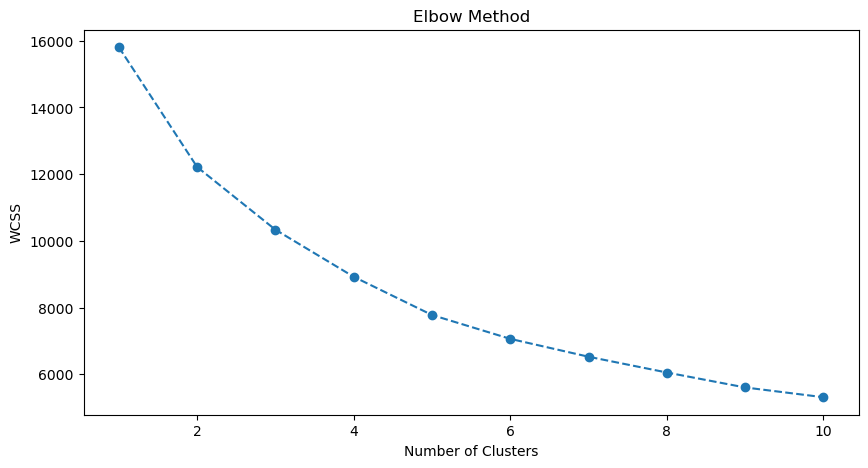

In [34]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=3)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


### 2. Applying K-Means with Optimal K

Based on the Elbow Method, we choose the optimal K=2

In [ ]:
# Apply K-Means with the chosen number of clusters
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=3)
clusters = kmeans.fit_predict(df_scaled)

# Add the cluster labels to the original dataframe
df['Cluster'] = clusters


### Evaluation of the Clustering

#### Visualizing the Clusters
Visualizing high-dimensional clusters can be challenging. 

One approach is to use dimensionality reduction techniques like PCA (Principal Component Analysis) to reduce the dimensions to 2 or 3 for visualization purposes.

C:\Users\jessi\AppData\Local\Temp\ipykernel_31940\3635115882.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PCA1'] = pca_components[:, 0]
C:\Users\jessi\AppData\Local\Temp\ipykernel_31940\3635115882.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PCA2'] = pca_components[:, 1]
C:\Users\jessi\AppData\Local\Temp\ipykernel_31940\3635115882.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

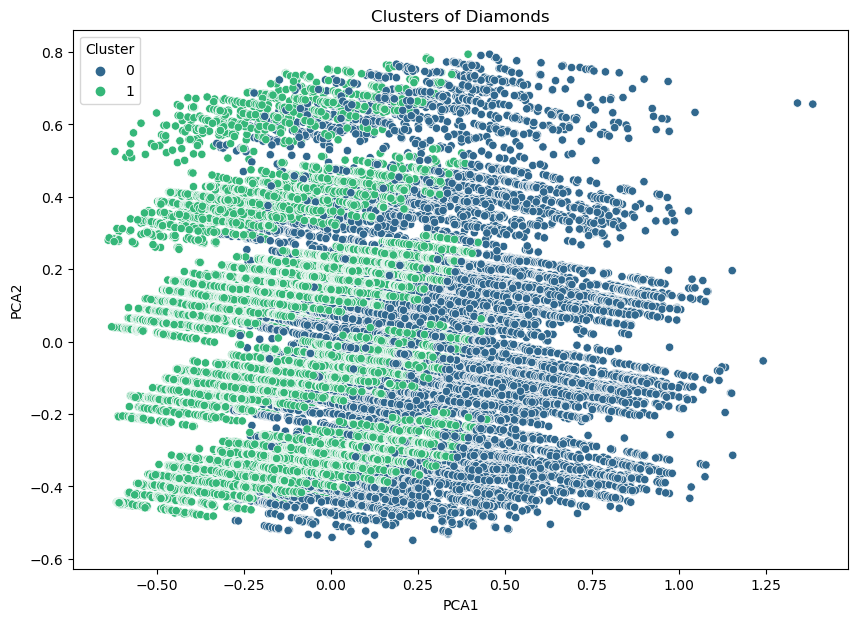

In [35]:
from sklearn.decomposition import PCA

# Reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)

# Add the PCA components and clusters to the dataframe
df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]
df['Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='viridis')
plt.title('Clusters of Diamonds')
plt.show()



# Hyper parameters

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans

# Define the parameter grid
param_grid = {
    'n_clusters': [2,3, 4, 5, 6, 7],  # Number of clusters to try
    'max_iter': [300, 500, 1000],
    'n_init': [10, 20, 30]
}

# Initialize KMeans
kmeans = KMeans(random_state=0)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=kmeans, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model
grid_search.fit(df_scaled)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Apply KMeans with the best parameters
kmeans_best = KMeans(n_clusters=best_params['n_clusters'], max_iter=best_params['max_iter'], n_init=best_params['n_init'], random_state=3)
clusters_best = kmeans_best.fit_predict(df_scaled)

# Add the clusters to the dataframe
df['Best_Cluster'] = clusters_best


C:\Users\jessi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jessi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 980, in _score
    scores = scorer(estimator, X_test, **score_params)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Users\jessi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jessi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 980, in _score
    scores = scorer(estimator, X_test, **score_params)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
C:\Use

Best parameters found:  {'max_iter': 300, 'n_clusters': 2, 'n_init': 10}


C:\Users\jessi\AppData\Local\Temp\ipykernel_31940\2996747883.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Best_Cluster'] = clusters_best


Best parameters found:  {'max_iter': 300, 'n_clusters': 2, 'n_init': 10}

C:\Users\jessi\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jessi\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jessi\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\jessi\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

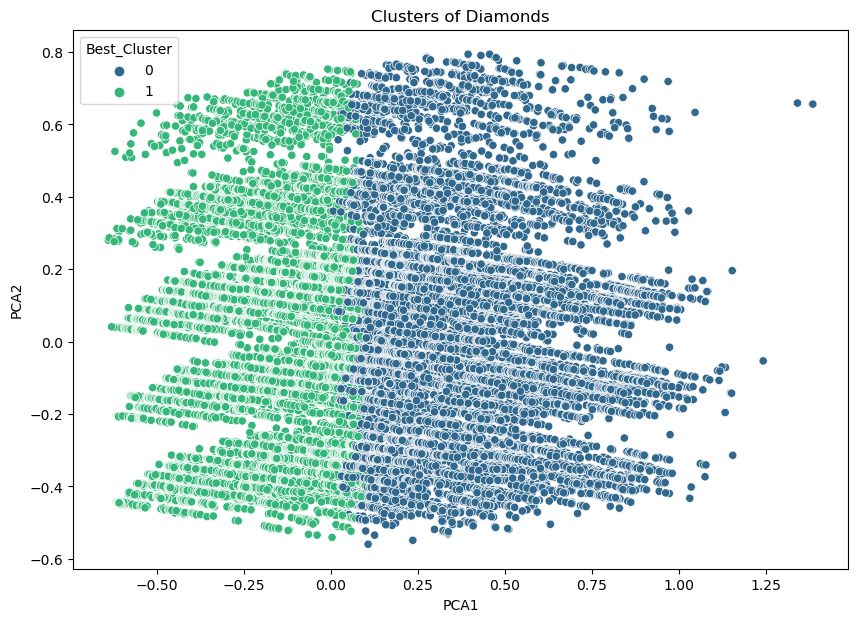

In [37]:
# Visualize the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Best_Cluster', data=df, palette='viridis')
plt.title('Clusters of Diamonds')
plt.show()


In [ ]:
It seems that the hyperparameter modification improved the clustering. Now the clusters appear clearer.